In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp /content/drive/MyDrive/CSVs/* ./

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [496]:
df = pd.read_csv('/content/Google_stock.csv')

In [497]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,1062.989990,1033.040039,1057.829956,1044.959961,1655500,1044.959961
1,2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2,2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
3,2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
4,2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044


In [498]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400,1344.430054
249,2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100,1362.469971
250,2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600,1354.640015
251,2019-12-30,1357.000000,1337.839966,1356.810059,1339.709961,999700,1339.709961
252,2019-12-31,1340.660034,1332.130005,1335.790039,1339.390015,975700,1339.390015


#Closing Price Analysis

In [499]:
close = df['Close']
print(close)

0      1044.959961
1      1054.680054
2      1025.469971
3      1078.069946
4      1075.920044
          ...     
248    1344.430054
249    1362.469971
250    1354.640015
251    1339.709961
252    1339.390015
Name: Close, Length: 253, dtype: float64


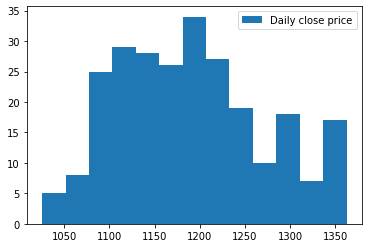

In [500]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

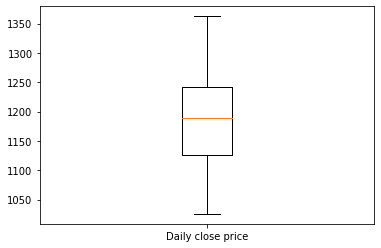

In [501]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

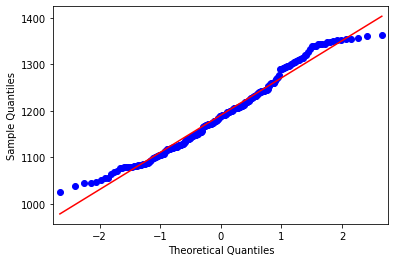

In [502]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [503]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))
print("Skewness of the distribution is: ", stats.skew(close))
print("Skewtest of the distribution is: ", stats.skewtest(close))
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Mean is:  1190.6388508792922
Standard deviation is:  80.00346720750319
Median is:  1189.4300537109375
Skewness of the distribution is:  0.29059016508890034
Skewtest of the distribution is:  SkewtestResult(statistic=1.9035975334732333, pvalue=0.056962620305662556)
Kurtosis of the distributionn is:  -0.6545965059562242
Kurtosis test of the distribution is:  KurtosistestResult(statistic=-3.0207826239989437, pvalue=0.002521222909454044)


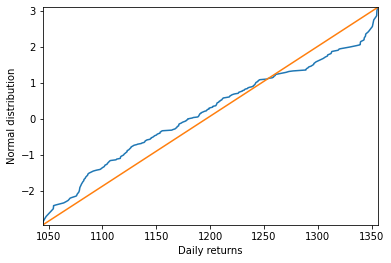

In [504]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

#**Stock Return Analysis**

In [505]:
## Daily Return
returns = close.pct_change(1).dropna()
returns = returns * 100
print(returns)

1      0.930188
2     -2.769568
3      5.129353
4     -0.199421
5      0.878314
         ...   
248   -0.459041
249    1.341826
250   -0.574688
251   -1.102142
252   -0.023882
Name: Close, Length: 252, dtype: float64


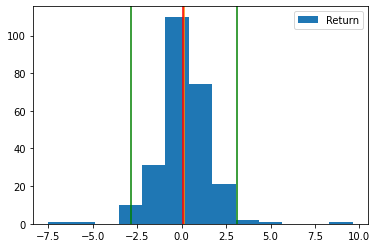

In [506]:
plt.hist(returns, bins="rice", label="Return")
plt.axvline(returns.mean(), color='darkorange')
plt.axvline(returns.median(), color='red')
plt.axvline(returns.mean() - 2*returns.std(), color='green')
plt.axvline(returns.mean() + 2*returns.std(), color='green')

plt.legend()
plt.show()

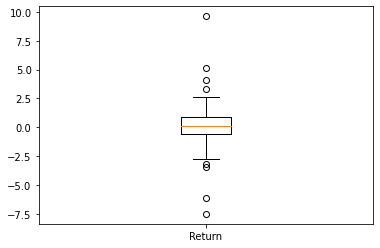

In [507]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

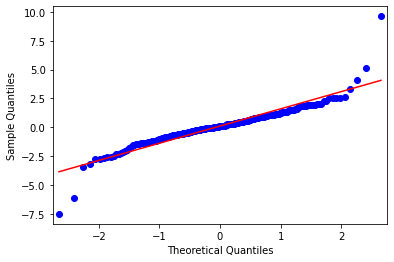

In [508]:
from statsmodels.graphics.gofplots import qqplot
qqplot(returns, line='s')
plt.show()

In [509]:
# Summary of stock price descriptive analysis
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))
print("Skewness of the distribution is: ", stats.skew(returns))
print("Skewtest of the distribution is: ", stats.skewtest(returns))
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Mean is:  0.10962322799682747
Standard deviation is:  1.490020849242543
Median is:  0.08828280592479976
Skewness of the distribution is:  0.3138207931435499
Skewtest of the distribution is:  SkewtestResult(statistic=2.0458841345431784, pvalue=0.04076777164885959)
Kurtosis of the distributionn is:  9.40531667648051
Kurtosis test of the distribution is:  KurtosistestResult(statistic=7.381680334517604, pvalue=1.563041170552381e-13)


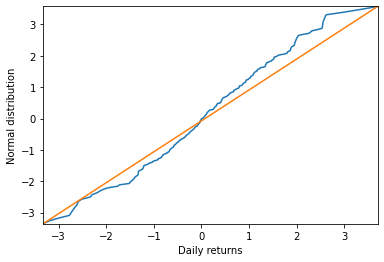

In [510]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()